In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2024-08-24 15:57:23.580328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X = tf.range(0, 100, 1)
X

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32)>

In [4]:
y = X + 10
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109], dtype=int32)>

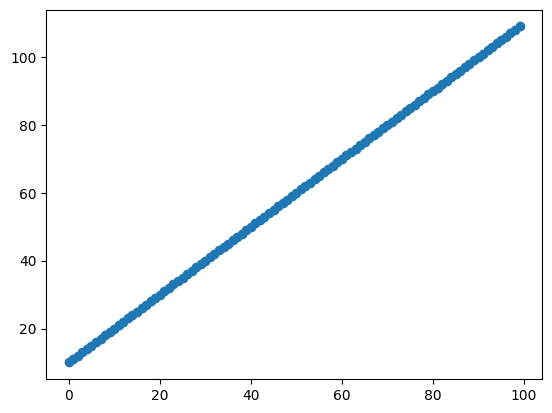

In [6]:
plt.scatter(X, y)

In [9]:
X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_true = y[80:]

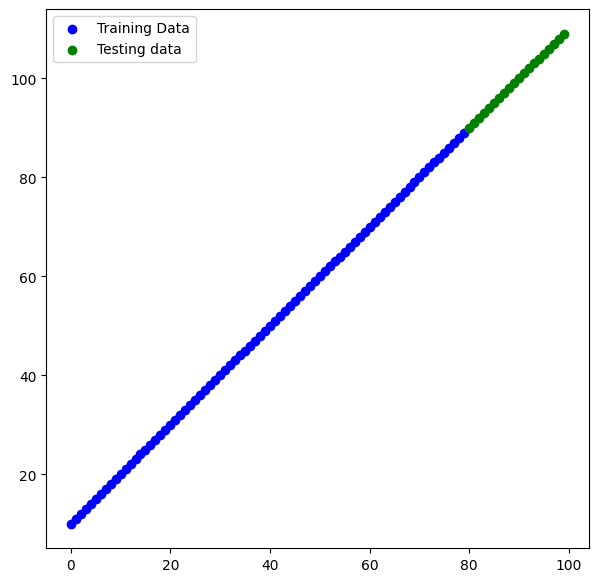

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_true, c='g', label='Testing data')
plt.legend();

In [12]:
X_train.shape

TensorShape([80])

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=['mae'])

history = model.fit(tf.expand_dims(X_train, 1), y_train, epochs=200, validation_data=(tf.expand_dims(X_test, 1), tf.expand_dims(y_true, 1)))

Epoch 1/200
3/3 [==============================] - 1s 78ms/step - loss: 47.5863 - mae: 47.5863 - val_loss: 83.8254 - val_mae: 83.8254
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 40.8473 - mae: 40.8473 - val_loss: 68.5922 - val_mae: 68.5922
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 34.4765 - mae: 34.4765 - val_loss: 57.4180 - val_mae: 57.4180
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 29.5282 - mae: 29.5282 - val_loss: 45.9186 - val_mae: 45.9186
Epoch 5/200
3/3 [==============================] - 0s 19ms/step - loss: 24.3224 - mae: 24.3224 - val_loss: 33.8187 - val_mae: 33.8187
Epoch 6/200
3/3 [==============================] - 0s 19ms/step - loss: 18.9618 - mae: 18.9618 - val_loss: 21.0060 - val_mae: 21.0060
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 13.0087 - mae: 13.0087 - val_loss: 7.3799 - val_mae: 7.3799
Epoch 8/200
3/3 [==============================] - 0s 15ms/step 

1/1 [==============================] - 0s 52ms/step


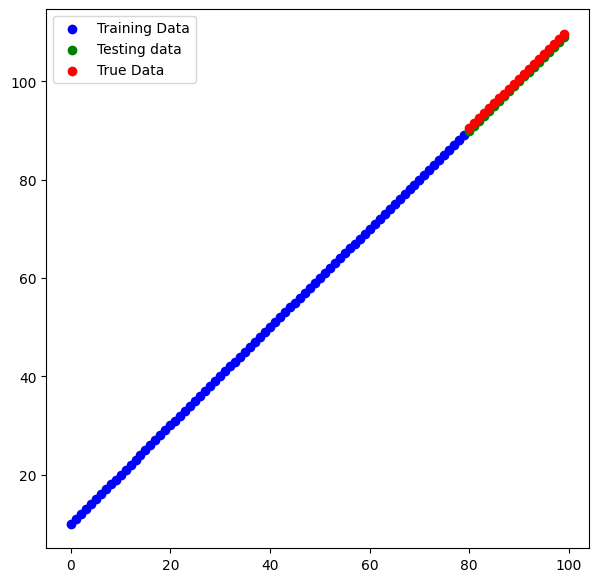

In [30]:
y_pred = model.predict(tf.expand_dims(X_test, 1))
plt.figure(figsize=(7,7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_true, c='g', label='Testing data')
plt.scatter(X_test, y_pred, c='r', label='True Data')
plt.legend();

In [31]:
model.predict([5])

1/1 [==============================] - 0s 73ms/step


array([[15.043054]], dtype=float32)

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 100)               1100      
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2141 (8.36 KB)
Trainable params: 2141 (8.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
